In [1]:
import numpy as np
from numpy import genfromtxt
from keras import layers
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
data_concrete = np.genfromtxt("/content/drive/MyDrive/AM/concrete.csv", delimiter = ',')

In [3]:
data_concrete.shape

(1030, 9)

In [4]:
np.random.seed(140)

In [5]:
np.random.shuffle(data_concrete)

In [6]:
data_vowel = np.genfromtxt("/content/drive/MyDrive/AM/vowel.csv", delimiter = ',')

In [7]:
data_vowel.shape

(990, 11)

In [8]:
np.random.seed(140)

In [9]:
np.random.shuffle(data_vowel)

In [10]:
def normalize(X_treino, X_validacao, X_teste):
  
  Xmax = np.max(X_treino, axis = 0)
  Xmin = np.min(X_treino, axis = 0)

  X_treino_normalizado = (X_treino - Xmin)/(Xmax - Xmin)
  X_validacao_normalizado = (X_validacao - Xmin)/(Xmax - Xmin)
  X_teste_normalizado = (X_teste - Xmin)/(Xmax - Xmin)
   
  return X_treino_normalizado, X_validacao_normalizado, X_teste_normalizado

In [11]:
a = int(data_concrete.shape[0]*0.6)
b = int(data_concrete.shape[0]*0.2)

treino_concrete = data_concrete[ : a]
validacao_concrete = data_concrete[a : -b]
teste_concrete = data_concrete[-b : ]

X_tr_normal_concrete, X_vali_normal_concrete, X_tes_normal_concrete = normalize(treino_concrete, validacao_concrete, teste_concrete)

Xtr_concrete = X_tr_normal_concrete[ : , : -1]
ytr_concrete = X_tr_normal_concrete[ : , -1]
Xva_concrete = X_vali_normal_concrete[ : , : -1]
yva_concrete = X_vali_normal_concrete[ : , -1]
Xte_concrete = X_tes_normal_concrete[ : , : -1]
yte_concrete = X_tes_normal_concrete[ : , -1]

c = int(data_vowel.shape[0]*0.6)
d = int(data_vowel.shape[0]*0.2)

treino_vowel = data_vowel[ : c]
validacao_vowel = data_vowel[c : -d]
teste_vowel = data_vowel[-d : ]

X_tr_normal_vowel, X_vali_normal_vowel, X_tes_normal_vowel = normalize(treino_vowel, validacao_vowel, teste_vowel)

Xtr_vowel = X_tr_normal_vowel[ : , : -1]
ytr_vowel = X_tr_normal_vowel[ : , -1]
ytr_vowel = keras.utils.to_categorical(ytr_vowel, num_classes = 11)

Xva_vowel = X_vali_normal_vowel[ : , : -1]
yva_vowel = X_vali_normal_vowel[ : , -1]
yva_vowel = keras.utils.to_categorical(yva_vowel, num_classes = 11)

Xte_vowel = X_tes_normal_vowel[ : , : -1]
yte_vowel = X_tes_normal_vowel[ : , -1]
yte_vowel = keras.utils.to_categorical(yte_vowel, num_classes = 11)

In [12]:
bl = [16, 32, 64, 128]
nl = [15, 35]
ml = [0.7, 0.9]

In [13]:
modelo_data_concrete = []
historico_data_concrete = []

modelo_data_vowel = []
historico_data_vowel = []

In [14]:
for b in bl:
  for n in nl:
    for m in ml:
      sgd = tf.keras.optimizers.legacy.SGD(momentum = m, nesterov = True)

      entrada_concrete = keras.Input(shape = data_concrete.shape[1] - 1)
      entrada_vowel = keras.Input(shape = data_vowel.shape[1] - 1)

      oculta_concrete = layers.Dense(n, activation = 'tanh')(entrada_concrete)
      oculta_vowel = layers.Dense(n, activation = 'relu')(entrada_vowel)

      saida_concrete = layers.Dense(1)(oculta_concrete)
      saida_vowel = layers.Dense(11, activation = 'softmax')(oculta_vowel)

      modelo_concrete = keras.Model(entrada_concrete, saida_concrete)
      modelo_vowel = keras.Model(entrada_vowel, saida_vowel)

      modelo_concrete.compile(optimizer = sgd, loss = "mean_squared_error")
      modelo_vowel.compile(optimizer = sgd, loss = "categorical_crossentropy")

      historia_concrete = modelo_concrete.fit(x = Xtr_concrete, y = ytr_concrete, batch_size = b, validation_data = (Xva_concrete, yva_concrete), epochs = 100, verbose = 0)
      historia_vowel = modelo_vowel.fit(x = Xtr_vowel, y = ytr_vowel, batch_size = b, validation_data = (Xva_vowel, yva_vowel), epochs = 100, verbose = 0)

      modelo_data_concrete.append(modelo_concrete)
      modelo_data_vowel.append(modelo_vowel)
      historico_data_concrete.append(historia_concrete)
      historico_data_vowel.append(historia_vowel)

In [17]:
vlv = np.zeros(len(bl)*len(nl)*len(ml))
vlc = np.zeros(len(bl)*len(nl)*len(ml))

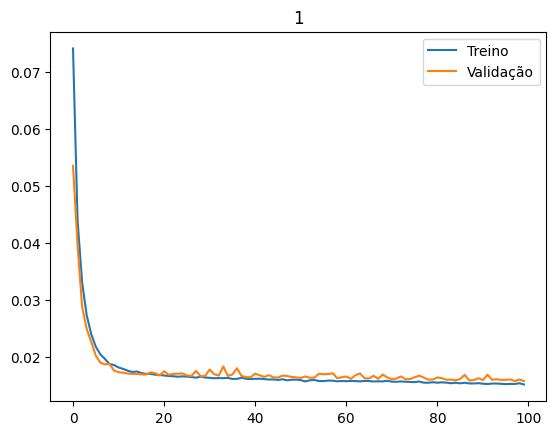

Treino:  0.01522140298038721
Validação 0.015824967995285988


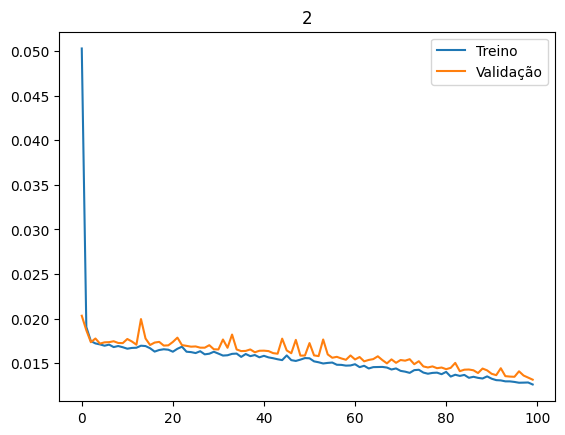

Treino:  0.012602793984115124
Validação 0.013142084702849388


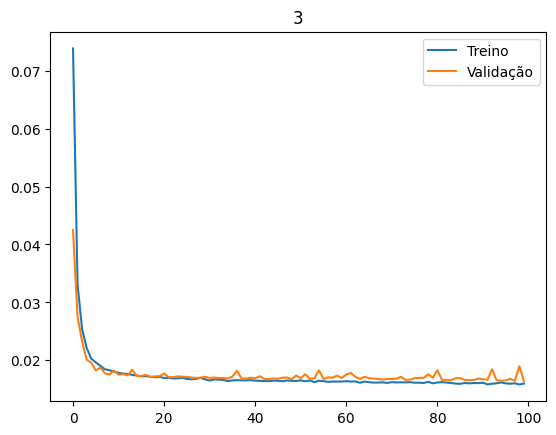

Treino:  0.01598157361149788
Validação 0.016382968053221703


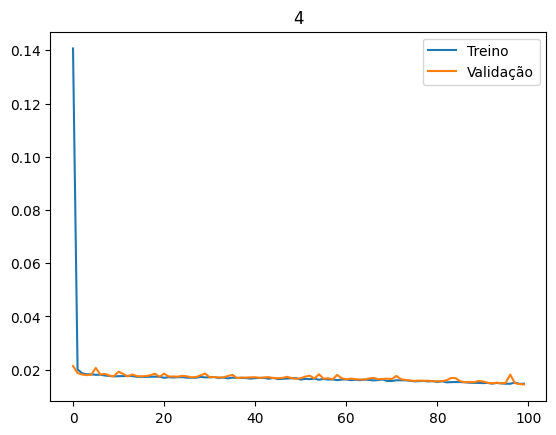

Treino:  0.014682947658002377
Validação 0.01439453475177288


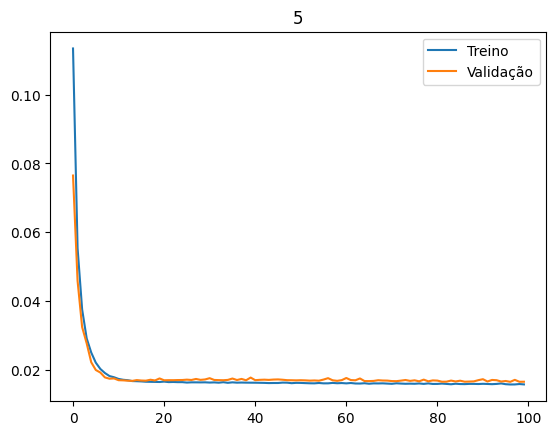

Treino:  0.015701714903116226
Validação 0.016483407467603683


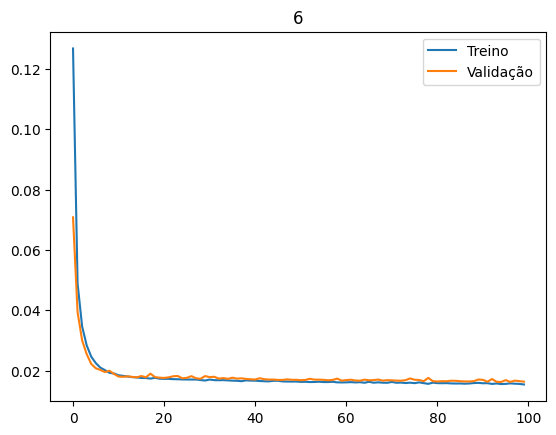

Treino:  0.015390155836939812
Validação 0.016320092603564262


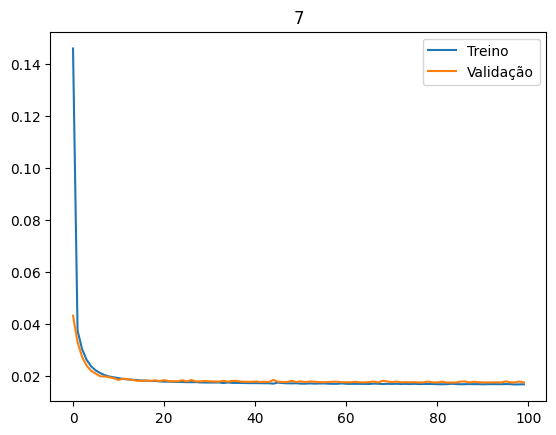

Treino:  0.016709983348846436
Validação 0.01742747612297535


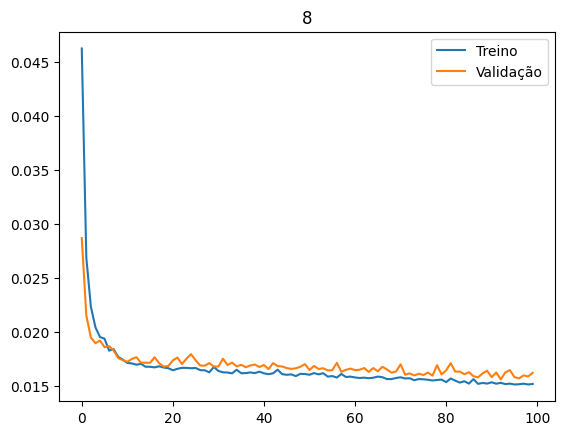

Treino:  0.015191860496997833
Validação 0.016221029683947563


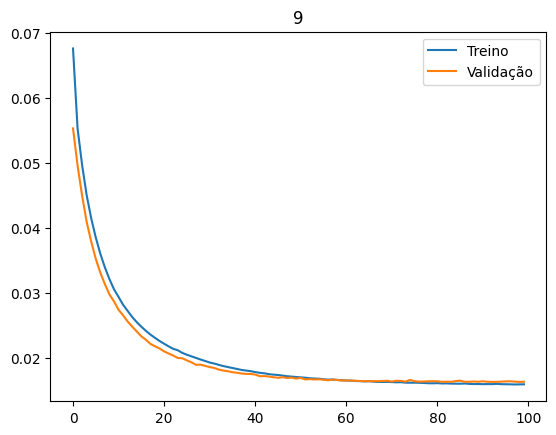

Treino:  0.015924697741866112
Validação 0.01631607860326767


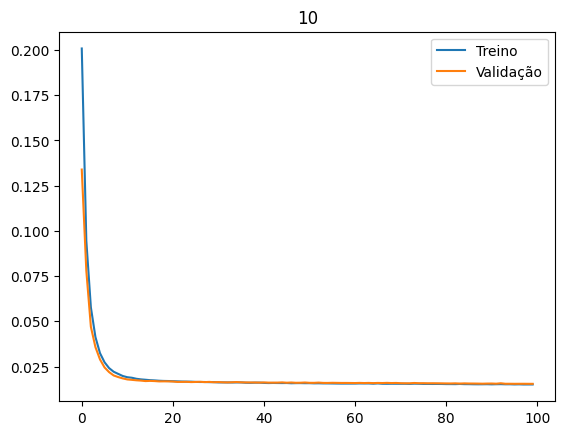

Treino:  0.015087726525962353
Validação 0.015434728004038334


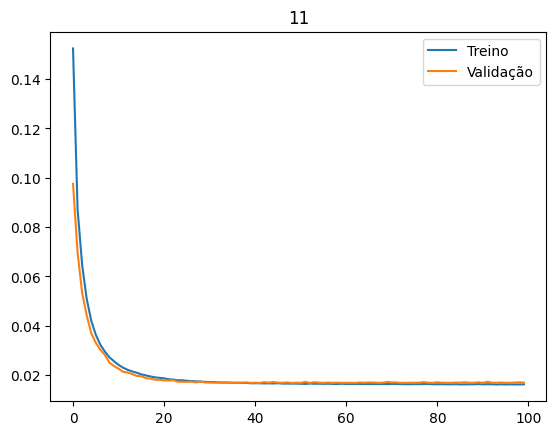

Treino:  0.016246460378170013
Validação 0.01697532832622528


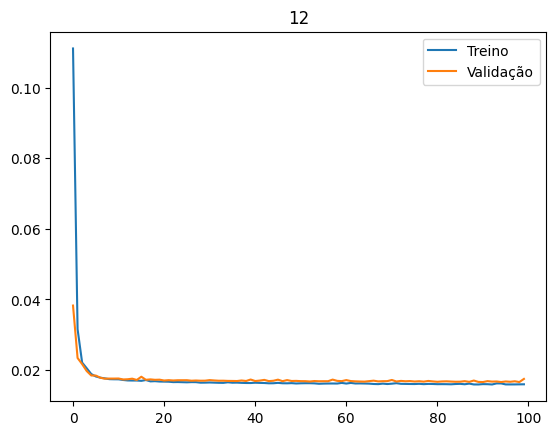

Treino:  0.015957674011588097
Validação 0.017483051866292953


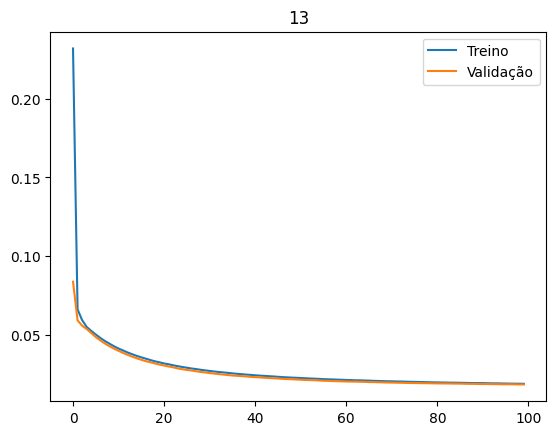

Treino:  0.0188776683062315
Validação 0.018462490290403366


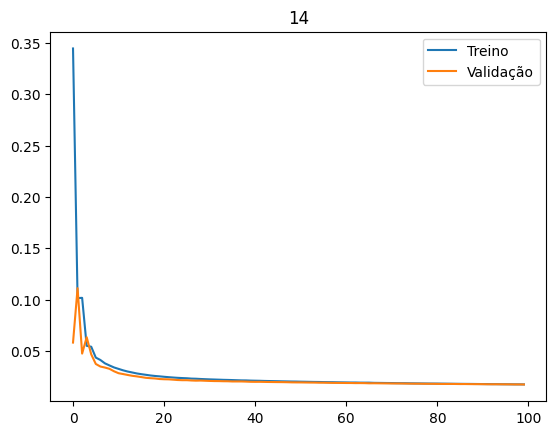

Treino:  0.017352238297462463
Validação 0.01729687489569187


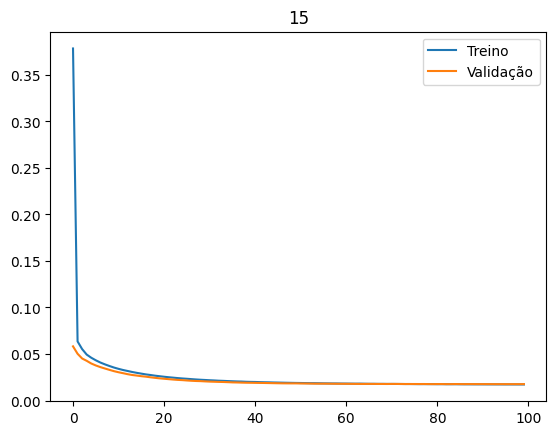

Treino:  0.017239654436707497
Validação 0.017629610374569893


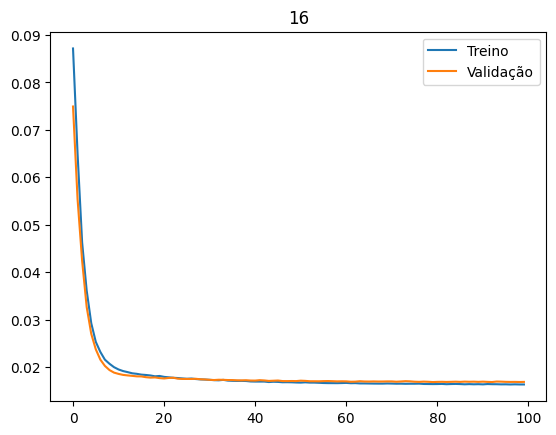

Treino:  0.01631474494934082
Validação 0.016858652234077454


In [18]:
for index, h in enumerate(historico_data_concrete):

  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.legend()
  plt.title(index + 1)
  plt.show()

  print("Treino: ", h.history['loss'][-1])
  print("Validação", h.history['val_loss'][-1])
  vlc[index] = h.history['val_loss'][-1]

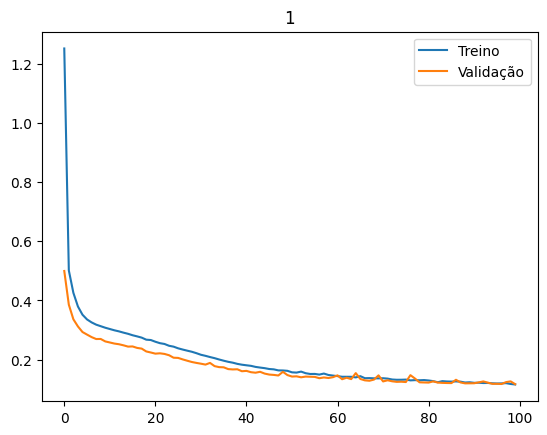

Treino:  0.11582604795694351
Validação:  0.11693155765533447


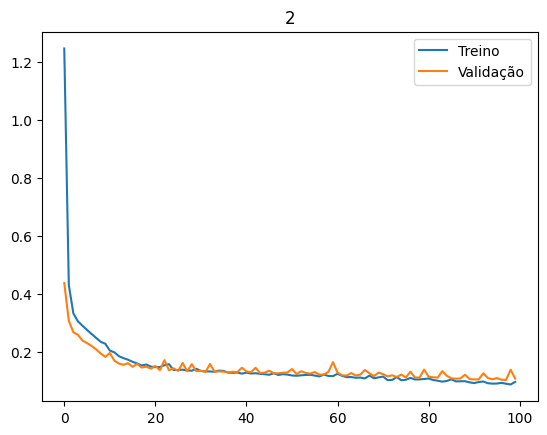

Treino:  0.09627865254878998
Validação:  0.10793179273605347


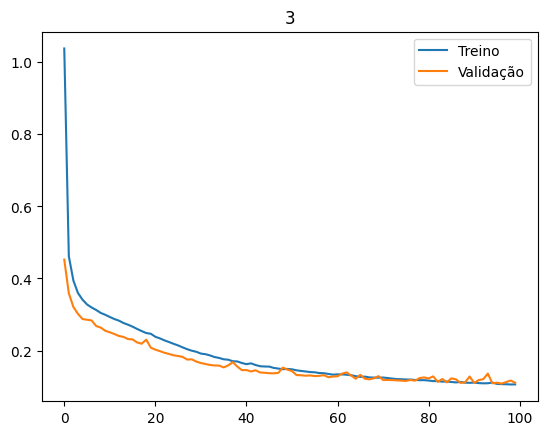

Treino:  0.10622789710760117
Validação:  0.11076199263334274


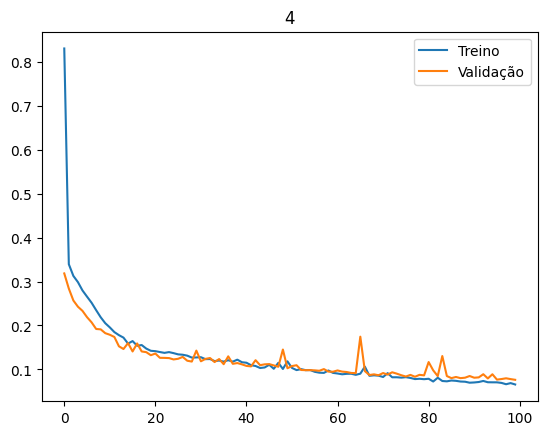

Treino:  0.06583501398563385
Validação:  0.07646242529153824


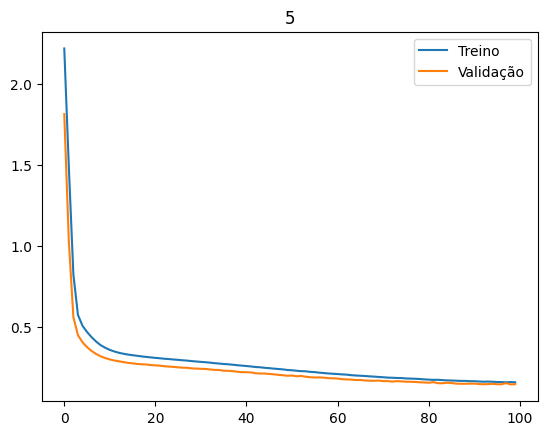

Treino:  0.16045710444450378
Validação:  0.14902640879154205


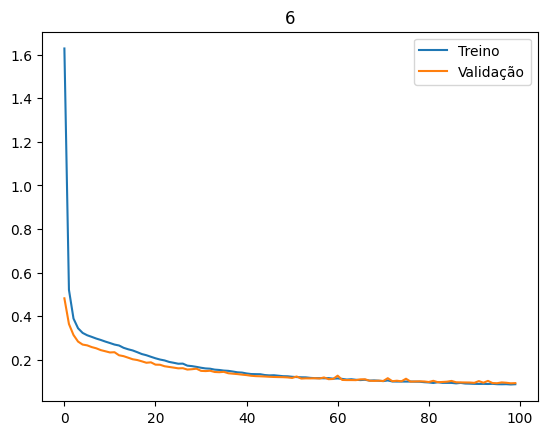

Treino:  0.08784227073192596
Validação:  0.09291919320821762


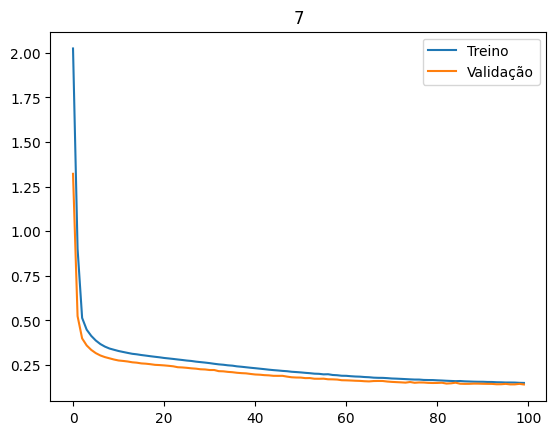

Treino:  0.14995624125003815
Validação:  0.1412959098815918


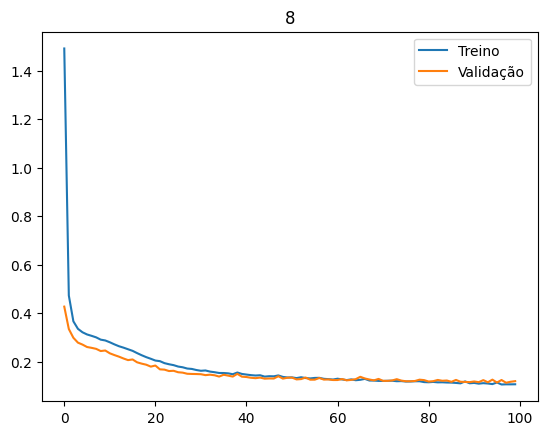

Treino:  0.10778354853391647
Validação:  0.12066377699375153


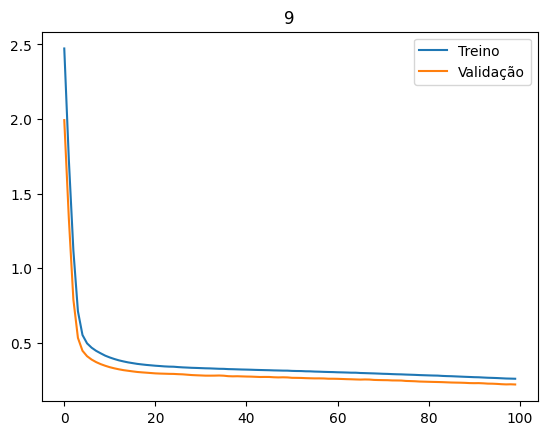

Treino:  0.25922083854675293
Validação:  0.22079989314079285


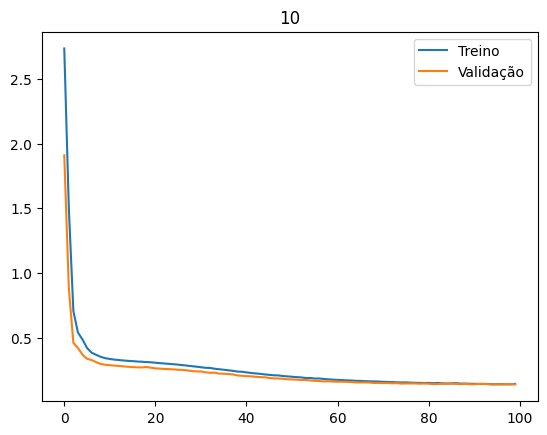

Treino:  0.14314386248588562
Validação:  0.13961702585220337


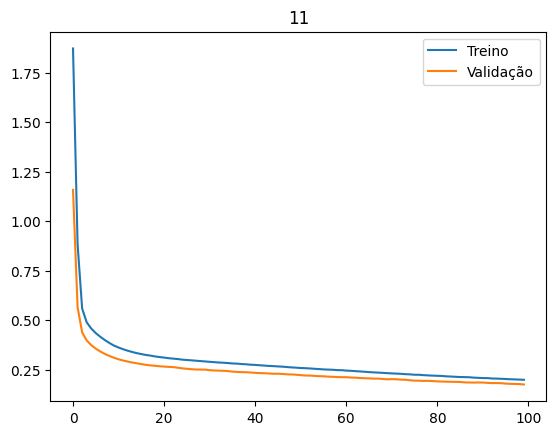

Treino:  0.19817058742046356
Validação:  0.17449133098125458


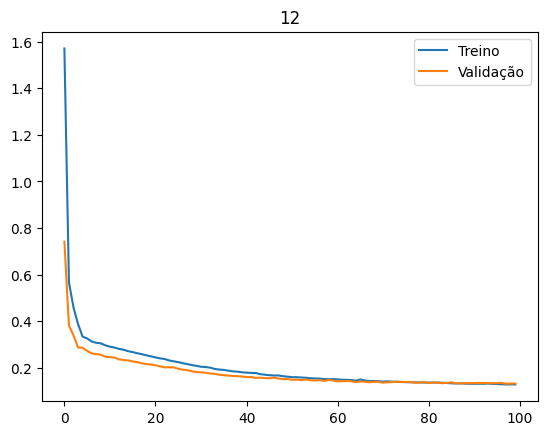

Treino:  0.1286998838186264
Validação:  0.13263659179210663


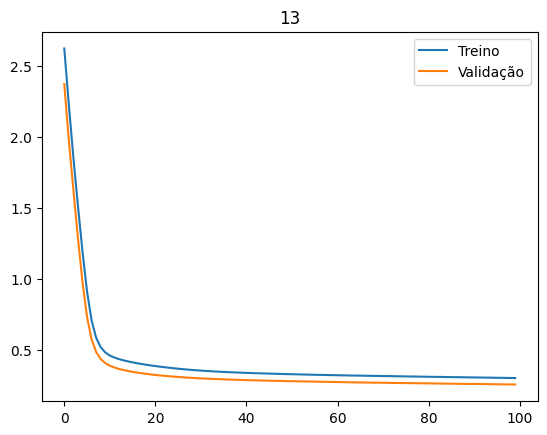

Treino:  0.3001185953617096
Validação:  0.25462672114372253


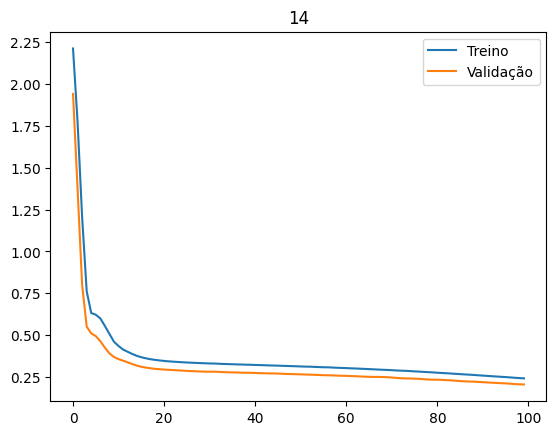

Treino:  0.2412906289100647
Validação:  0.2046208679676056


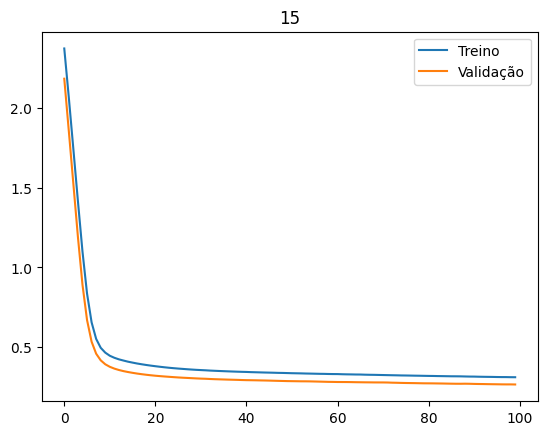

Treino:  0.3123180866241455
Validação:  0.26691606640815735


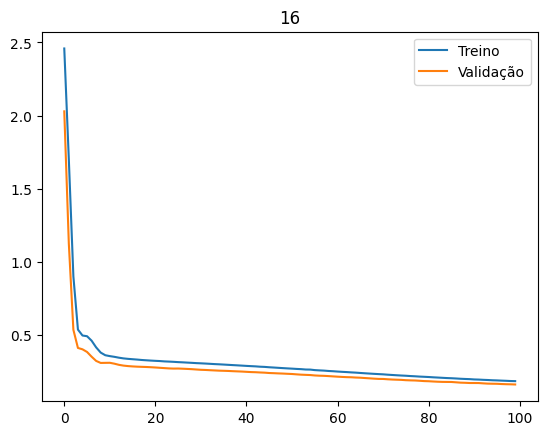

Treino:  0.1858062446117401
Validação:  0.1629571169614792


In [19]:
for index, h in enumerate(historico_data_vowel):
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.legend()
  plt.title(index + 1)
  plt.show()

  print("Treino: ", h.history['loss'][-1])
  print("Validação: ", h.history['val_loss'][-1])
  vlv[index] = h.history['val_loss'][-1]

In [20]:
ilv = np.argmin(vlv)
ilc = np.argmin(vlc)

b_vowel, n_vowel, m_vowel = np.unravel_index(ilv, (len(bl), len(nl), len(ml)))
b_concrete, n_concrete, m_concrete = np.unravel_index(ilc, (len(bl), len(nl), len(ml)))

bv = bl[b_vowel]
nv = nl[n_vowel]
mv = ml[m_vowel]
bc = bl[b_concrete]
nc = nl[n_concrete]
mc = ml[m_concrete]

print("Para o dataset concrete:")
print("b: ", bc)
print("n: ", nc)
print("m: ", mc)
print("\n")
print("Para o dataset vowel:")
print("b: ", bv)
print("n: ", nv)
print("m: ", mv)

Para o dataset concrete:
b:  16
n:  15
m:  0.9


Para o dataset vowel:
b:  16
n:  35
m:  0.9


In [21]:
sgdc = keras.optimizers.SGD(momentum = mc, nesterov = True)
entrada_concrete = keras.Input(shape = data_concrete.shape[1] - 1)
oculta_concrete = layers.Dense(nc, activation = 'tanh')(entrada_concrete)
saida_concrete = layers.Dense(1)(oculta_concrete)

modelo_concrete = keras.Model(entrada_concrete, saida_concrete)
modelo_concrete.compile(optimizer = sgdc, loss = "mean_squared_error")
modelo_concrete.fit(x = np.r_[Xtr_concrete, Xva_concrete], y = np.r_[ytr_concrete, yva_concrete], batch_size = bc, epochs = 100, verbose = 0)

In [22]:
predtrc = modelo_concrete.predict(Xtr_concrete, verbose = 0)
rmsetrc = np.sqrt(np.mean((predtrc - ytr_concrete) ** 2))
maetrc = np.mean(np.absolute(predtrc - ytr_concrete))

w = np.where(ytr_concrete != 0)
mretrc = np.mean(np.absolute((predtrc[w] - ytr_concrete[w])/ytr_concrete[w]))

print("Métricas para o conjunto de Treino:")
print("RMSE: ", rmsetrc)
print("MAE: ", maetrc)
print("MRE: ", mretrc)

Métricas para o conjunto de Treino:
RMSE:  0.26999674177603933
MAE:  0.21619555027455503
MRE:  0.8865110035043341


In [23]:
predvac = modelo_concrete.predict(Xva_concrete, verbose = 0)
rmsevac = np.sqrt(np.mean((predvac - yva_concrete) ** 2))
maevac = np.mean(np.absolute(predvac - yva_concrete))

w = np.where(yva_concrete != 0)
mrevac = np.mean(np.absolute((predvac[w] - yva_concrete[w])/yva_concrete[w]))

print("Métricas para o conjunto de Validação:")
print("RMSE: ", rmsevac)
print("MAE: ", maevac)
print("MRE: ", mrevac)

Métricas para o conjunto de Validação:
RMSE:  0.28456980957500316
MAE:  0.22869113384520806
MRE:  0.7959961219656364


In [24]:
predtec = modelo_concrete.predict(Xte_concrete, verbose = 0)
rmsetec = np.sqrt(np.mean((predtec - yte_concrete) ** 2))
maetec = np.mean(np.absolute(predtec - yte_concrete))

w = np.where(yte_concrete != 0)
mretec = np.mean(np.absolute((predtec[w] - yte_concrete[w])/yte_concrete[w]))

print("Métricas para o conjunto de Teste:")
print("RMSE: ", rmsetec)
print("MAE: ", maetec)
print("MRE: ", mretec)

Métricas para o conjunto de Teste:
RMSE:  0.27730884431990227
MAE:  0.22416464850908613
MRE:  0.9802088422316478


In [25]:
sgdv = keras.optimizers.SGD(momentum = mv, nesterov = True)
entrada_vowel = keras.Input(shape = data_vowel.shape[1] - 1)
oculta_concrete = layers.Dense(nv, activation = 'relu')(entrada_vowel)
saida_concrete = layers.Dense(11, activation = 'softmax')(oculta_concrete)

modelo_vowel = keras.Model(entrada_vowel, saida_concrete)
modelo_vowel.compile(optimizer = sgdv, loss = "categorical_crossentropy", metrics = ['categorical_accuracy'])
modelo_vowel.fit(x = np.r_[Xtr_vowel, Xva_vowel], y = np.r_[ytr_vowel, yva_vowel], batch_size = bv, validation_data = (Xva_vowel, yva_vowel), epochs = 100, verbose = 0)

In [26]:
print("Métricas do conjunto de Treino: ", modelo_vowel.evaluate(x = Xtr_vowel, y = ytr_vowel, verbose = 0, return_dict = True))

Métricas do conjunto de Treino:  {'loss': 0.05512457713484764, 'categorical_accuracy': 0.9932659864425659}


In [27]:
print("Métricas do conjunto de Validação: ", modelo_vowel.evaluate(x = Xva_vowel, y = yva_vowel, verbose = 0, return_dict = True))

Métricas do conjunto de Validação:  {'loss': 0.0676201581954956, 'categorical_accuracy': 0.9797979593276978}


In [28]:
print("Métricas do conjunto de Teste: ", modelo_vowel.evaluate(x = Xte_vowel, y = yte_vowel, verbose = 0, return_dict = True))

Métricas do conjunto de Teste:  {'loss': 0.041715238243341446, 'categorical_accuracy': 0.9898989796638489}
